In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#loading the dataset

df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                997 non-null    int64 
 1   job_posted_date           997 non-null    object
 2   company_address_locality  950 non-null    object
 3   company_address_region    884 non-null    object
 4   company_name              997 non-null    object
 5   company_website           983 non-null    object
 6   company_description       985 non-null    object
 7   job_description_text      996 non-null    object
 8   seniority_level           988 non-null    object
 9   job_title                 997 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.0+ KB


In [10]:
print("columns:", df.columns.tolist())

columns: ['Unnamed: 0', 'job_posted_date', 'company_address_locality', 'company_address_region', 'company_name', 'company_website', 'company_description', 'job_description_text', 'seniority_level', 'job_title']


In [11]:
print(df['seniority_level'].value_counts())

seniority_level
Mid-Senior level    371
Entry level         300
Not Applicable      209
Internship           70
Associate            32
Director              5
Executive             1
Name: count, dtype: int64


In [16]:
def clean_data(data):
    data = str(data).lower()  # Convert to lowercase
    data = re.sub(r'[^a-zA-Z0-9\s]', '', data)  # Remove punctuation and numbers
    return data
df['cleaned_data'] = df['job_description_text'].apply(clean_data)

In [17]:
skill_keywords = [
    'python', 'r', 'sql', 'java', 'c++', 'pytorch', 'tensorflow', 'excel', 
    'machine learning', 'deep learning', 'nlp', 'hadoop', 'spark', 'tableau', 
    'power bi', 'scikit-learn', 'keras', 'aws', 'azure', 'gcp', 'flask', 'fastapi'
]
def extract_skills(description):
    found = []
    for skill in skill_keywords:
        if skill in description:
            found.append(skill)
    return found

df['extracted_skills'] = df['cleaned_data'].apply(extract_skills)


In [19]:
def flatten(skill_lists):
    return [skill for sublist in skill_lists for skill in sublist]

entry_skills = flatten(df[df['seniority_level'].str.contains('Entry', na=False)]['extracted_skills'])
senior_skills = flatten(df[df['seniority_level'].str.contains('Senior', na=False)]['extracted_skills'])

entry_counter = Counter(entry_skills)
senior_counter = Counter(senior_skills)

# Convert to DataFrame for comparison
comparison_df = pd.DataFrame([entry_counter, senior_counter], index=['Entry', 'Senior']).fillna(0).T
comparison_df['Difference'] = comparison_df['Senior'] - comparison_df['Entry']
comparison_df.sort_values(by='Difference', ascending=False, inplace=True)
comparison_df.head(10)

,Entry,Senior,Difference
r,300,371,71
python,233,295,62
machine learning,258,315,57
sql,78,123,45
gcp,29,74,45
pytorch,143,186,43
azure,35,75,40
tensorflow,130,154,24
spark,74,95,21
nlp,63,82,19


In [ ]:
#finding the top 3 in-demand skills
all_skills = flatten(df['extracted_skills'])
skill_freq = Counter(all_skills)
top_skills = skill_freq.most_common(3)
print("Top 3 In-Demand Skills are:")
print(top_skills)


Top 3 In-Demand Skills are:
[('r', 996), ('machine learning', 844), ('python', 752)]


PART 2

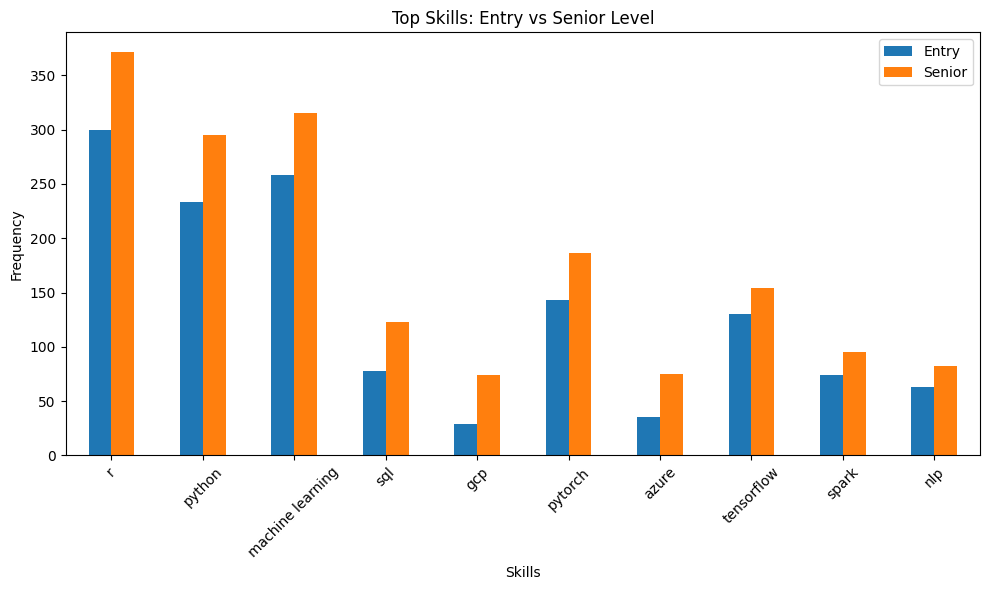

In [23]:
# Bar chart comparison
comparison_df[['Entry', 'Senior']].head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top Skills: Entry vs Senior Level")
plt.ylabel("Frequency")
plt.xlabel("Skills")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\paras\AppData\Local\Temp\ipykernel_36496\662064041.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Skill', data=skill_df, palette='viridis')


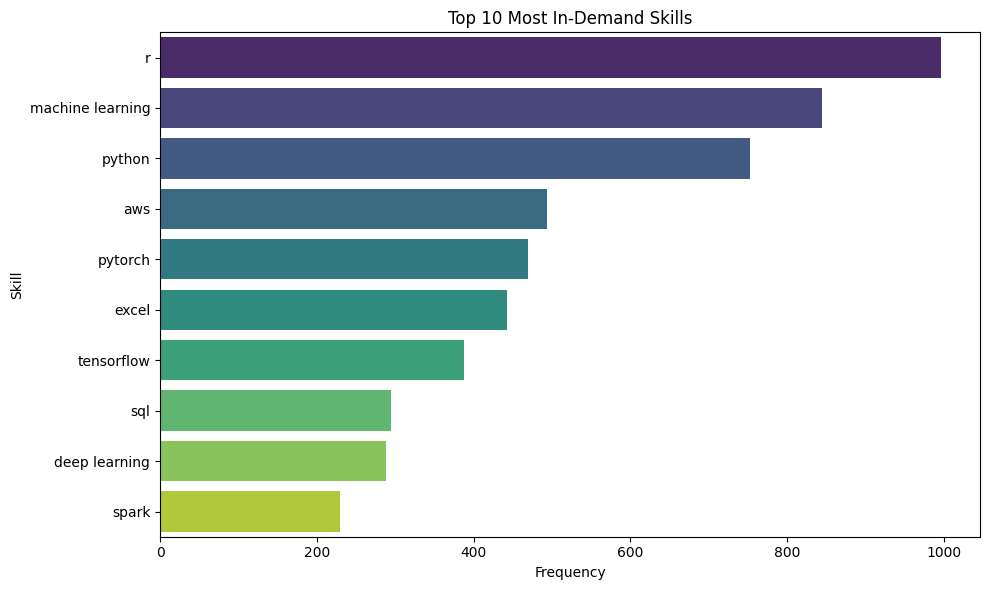

In [ ]:
# Convert to DataFrame for top skills
skill_df = pd.DataFrame(skill_freq.items(), columns=['Skill', 'Frequency'])
skill_df = skill_df.sort_values(by='Frequency', ascending=False).head(10)

# Barplot for top 10 skills
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Skill', data=skill_df, palette='viridis')
plt.title('Top 10 Most In-Demand Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()


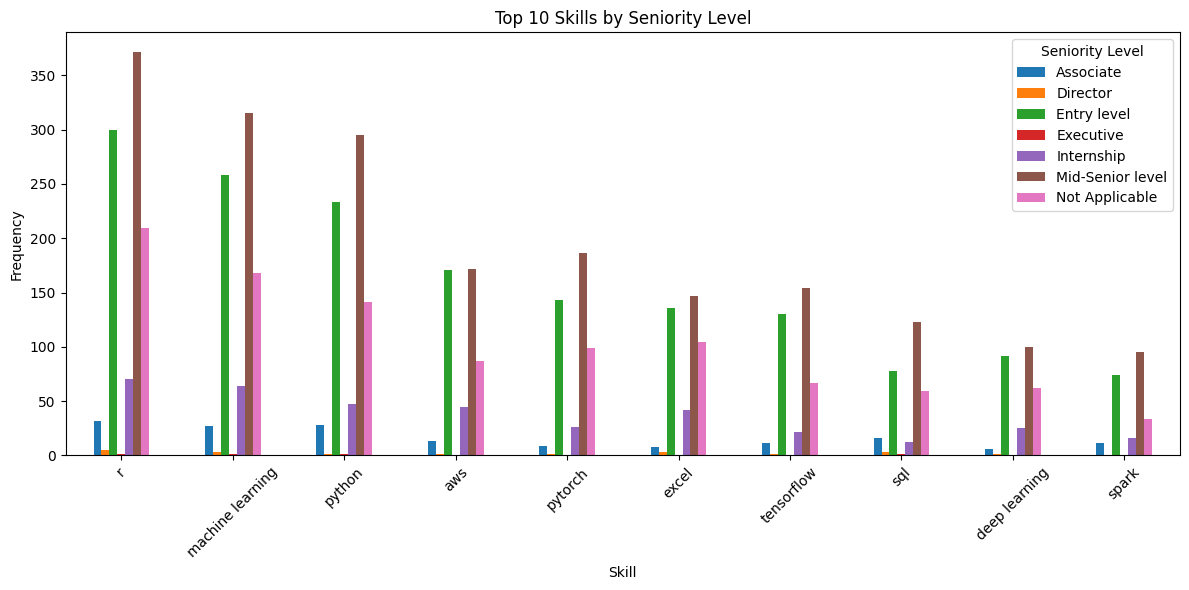

In [ ]:
# Fix top skill filtering
top_10_skills = skill_df['Skill'].head(10).tolist()

# Filter for top skills only
def filter_top_skills(skill_list):
    return [s for s in skill_list if s in top_10_skills]

df['top_skills_filtered'] = df['extracted_skills'].apply(filter_top_skills)

# Explode for group analysis
exploded_df = df[['seniority_level', 'top_skills_filtered']].explode('top_skills_filtered')

# Pivot table: skills vs seniority level
pivot = exploded_df.groupby(['top_skills_filtered', 'seniority_level']).size().unstack(fill_value=0)

# Ploting the top 10 skills by seniority level bar graph
pivot.loc[top_10_skills].plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Skills by Seniority Level")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Seniority Level")
plt.show()


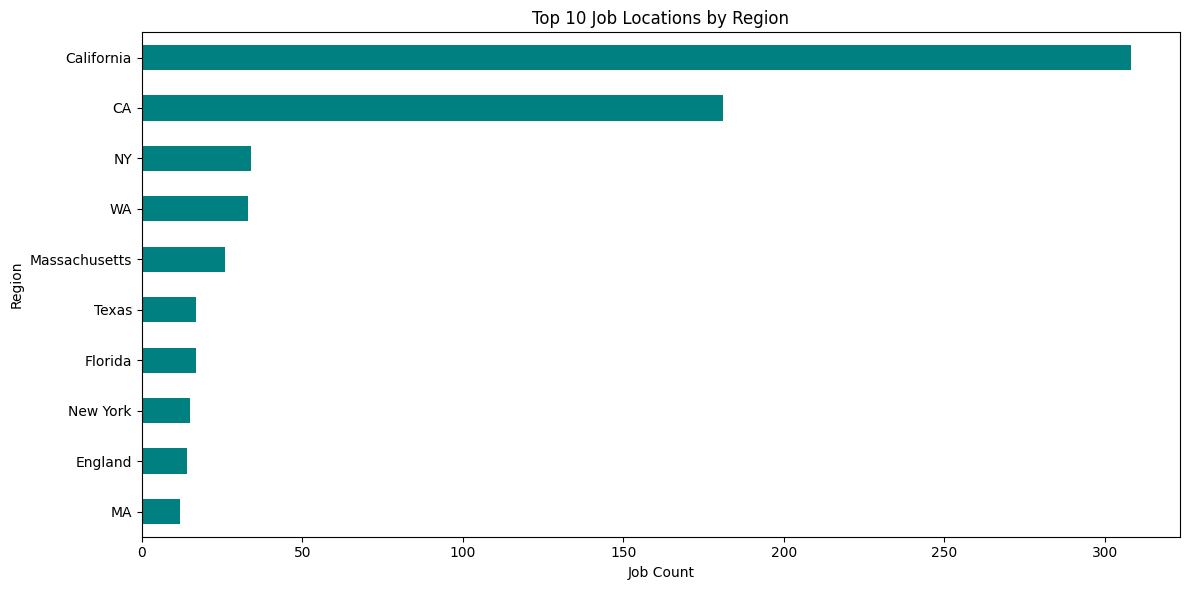

In [ ]:
#plotting the top 10 job locations by region
plt.figure(figsize=(12, 6))
df['company_address_region'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Job Locations by Region")
plt.xlabel("Job Count")
plt.ylabel("Region")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


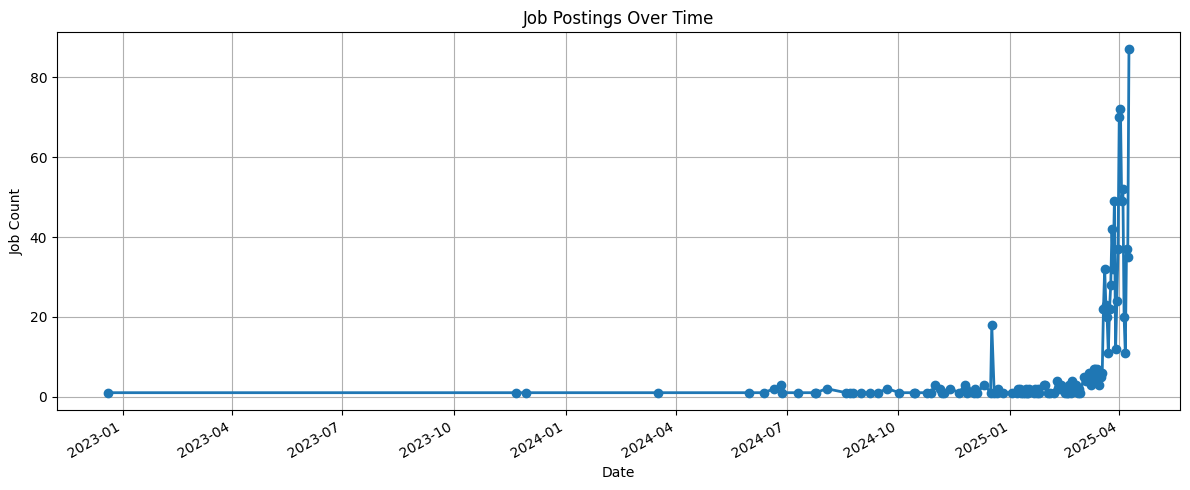

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df_date = df['job_posted_date'].value_counts().sort_index()

#plotting job postings over time
plt.figure(figsize=(12, 5))
df_date.plot(kind='line', marker='o', linewidth=2)
plt.title("Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Job Count")
plt.tight_layout()
plt.grid(True)
plt.show()